In [4]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import json
years = []
for i in range(2006,2019):
    years.append(str(i))

In [10]:
lower_listen_limit = 30
upper_listen_limit = 256

done


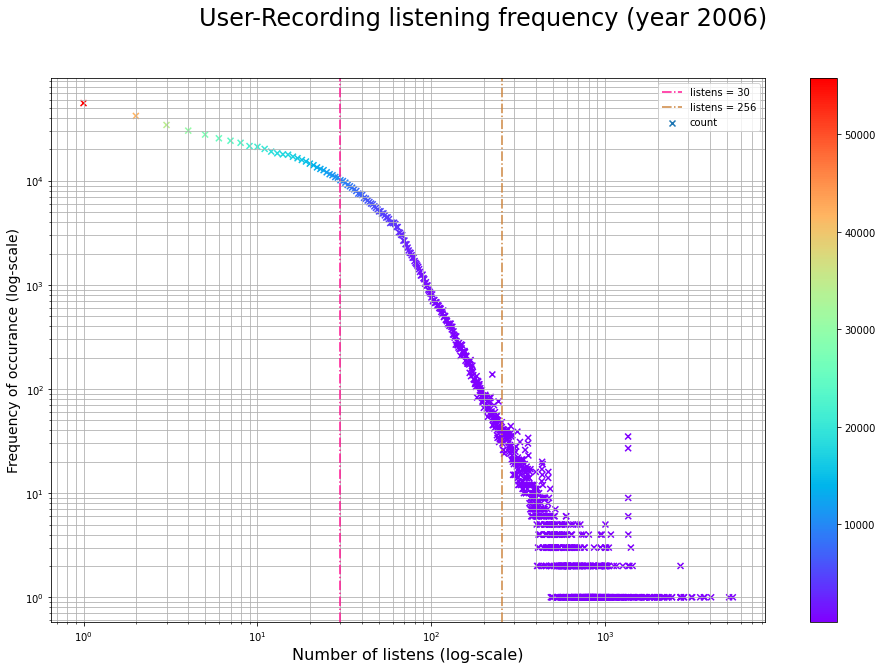

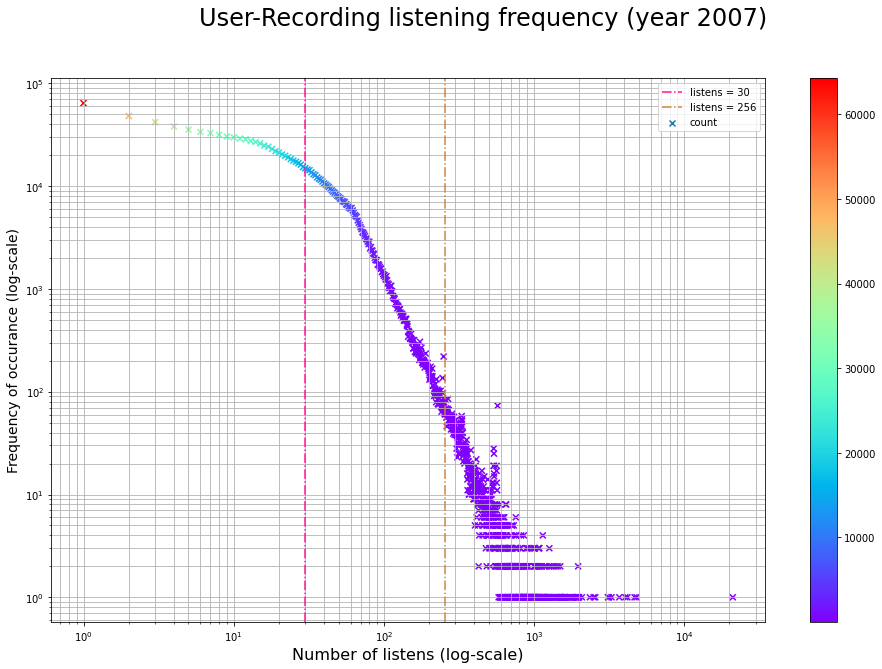

Error in callback <function flush_figures at 0x7f1824c91ca0> (for post_execute):


KeyboardInterrupt: 

In [13]:
for year in years:
    for f in glob("../out_data/yr_" + year + ".csv/part-*.csv"):
        df = pd.read_csv(f)
        #  drop 0 listens
        df = df[df.listens > 0] 

        fig = plt.figure(figsize=(16,10))
        fig.suptitle("User-Recording listening frequency (year "+year+")", fontsize=24)
        plt.grid(True, which="both", ls="-")
        plt.scatter(df["listens"], df["count"], marker='x', c=df["count"],  cmap=cm.rainbow, label = "count")
        plt.axvline(x=lower_listen_limit, c='deeppink', linestyle='-.', label="listens = " + str(lower_listen_limit))
        plt.axvline(x=upper_listen_limit, c='peru', linestyle='-.', label="listens = " + str(upper_listen_limit))
        plt.xlabel("Number of listens (log-scale)", fontsize=16)
        plt.ylabel("Frequency of occurance (log-scale)", fontsize=14)
        plt.xscale('log')
        plt.yscale('log')
        plt.colorbar()
        plt.legend()
        plt.savefig('images/'+year+"_all_listens_frequency_log_log.svg")
        plt.close(fig)
print('done')

done


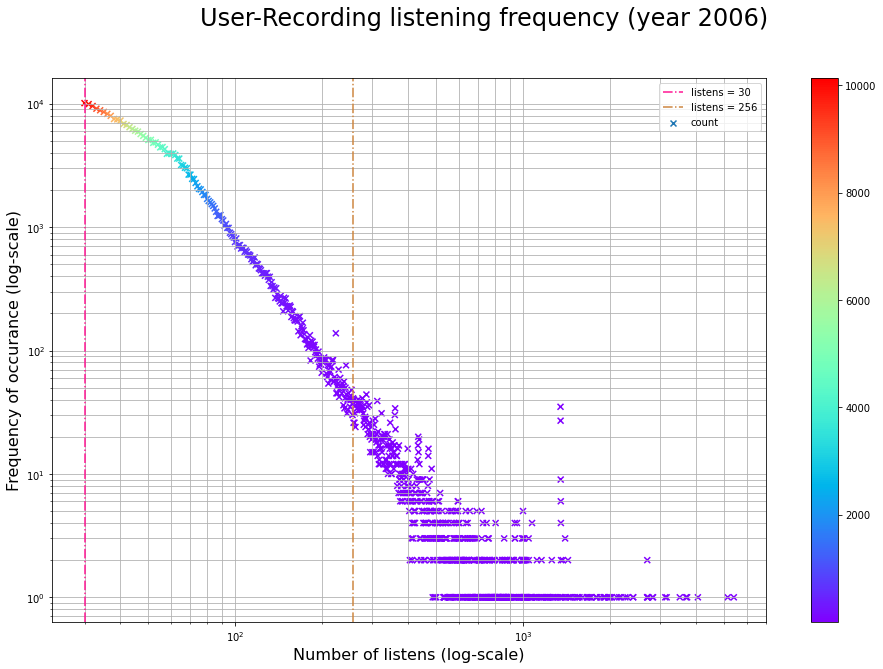

Error in callback <function flush_figures at 0x7f1824c91ca0> (for post_execute):


KeyboardInterrupt: 

In [14]:
for year in years:
    for f in glob("../out_data/yr_" + year + ".csv/part-*.csv"):
        df = pd.read_csv(f)
        #  drop 0 listens
        df = df[df.listens >= lower_listen_limit ] 

        fig = plt.figure(figsize=(16,10))
        fig.suptitle("User-Recording listening frequency (year "+year+")", fontsize=24)
        plt.grid(True, which="both", ls="-")
        plt.scatter(df["listens"], df["count"], marker='x', c=df["count"],  cmap=cm.rainbow, label = "count")
        plt.axvline(x=lower_listen_limit, c='deeppink', linestyle='-.', label="listens = " + str(lower_listen_limit))
        plt.axvline(x=upper_listen_limit, c='peru', linestyle='-.', label="listens = " + str(upper_listen_limit))
        plt.xlabel("Number of listens (log-scale)", fontsize=16)
        plt.ylabel("Frequency of occurance (log-scale)", fontsize=16)
        plt.xscale('log')
        plt.yscale('log')
        plt.colorbar()
        plt.legend()
        plt.savefig('images/'+year+"_above_"+str(lower_listen_limit)+"_listens_frequency_log_log.svg")
        plt.close(fig)

print('done')

done


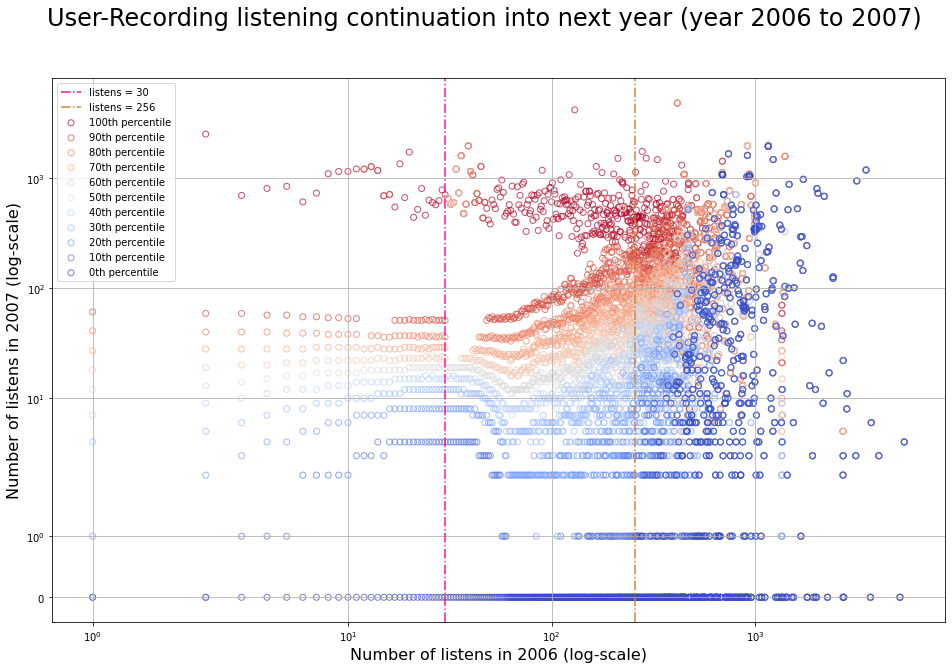

Error in callback <function flush_figures at 0x7f1824c91ca0> (for post_execute):


KeyboardInterrupt: 

In [15]:
import matplotlib
import matplotlib.cm as cm
import numpy as np
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
import seaborn as sns


for year in years:
    for f in glob("../out_data/yr_" + year + "_next_yr_percentiles.csv/part-*.csv"):
        df = pd.read_csv(f)
        #  drop edge cases that addect graph scaling
        # valid_mean = df['next_yr_mean'] != 0
        valid_count = df["yr_" + year] > 0
        # valid_std = df['next_yr_std'] != 0
        df = df[valid_count]

        fig = plt.figure(figsize=(16,10))
        fig.suptitle("User-Recording listening continuation into next year (year "+year+" to "+str(int(year)+1)+")", fontsize=24)
        for level in reversed(range(0,11)):
            rgba_color = cm.coolwarm(norm(level/10)) 
            plt.scatter(df["yr_" + year], df["percentile_" + str(level)], facecolors='none',
                        label = str(level*10) +"th percentile",
                        alpha=0.7,
                        # c=np.repeat(level*10, df.shape[0]),
                        # cmap=cm.viridis, rf,
                        color=rgba_color)

        plt.grid(True, which="both", ls="-")
        plt.xscale('symlog')
        plt.yscale('symlog')
        plt.axvline(x=lower_listen_limit, c='deeppink', linestyle='-.', label="listens = " + str(lower_listen_limit))
        plt.axvline(x=upper_listen_limit, c='peru', linestyle='-.', label="listens = " + str(upper_listen_limit))
        plt.xlabel("Number of listens in "+year+" (log-scale)", fontsize=16)
        plt.ylabel("Number of listens in "+str(int(year)+1)+" (log-scale)", fontsize=16)
        # plt.xlim((-0.1,1e3))
        # plt.ylim((-0.1,10e2))
        plt.legend()
        # plt.savefig('images/'+year+"_next_year_percentiles_log_log.svg")
        # plt.close(fig)

print('done')

# User usage patterns

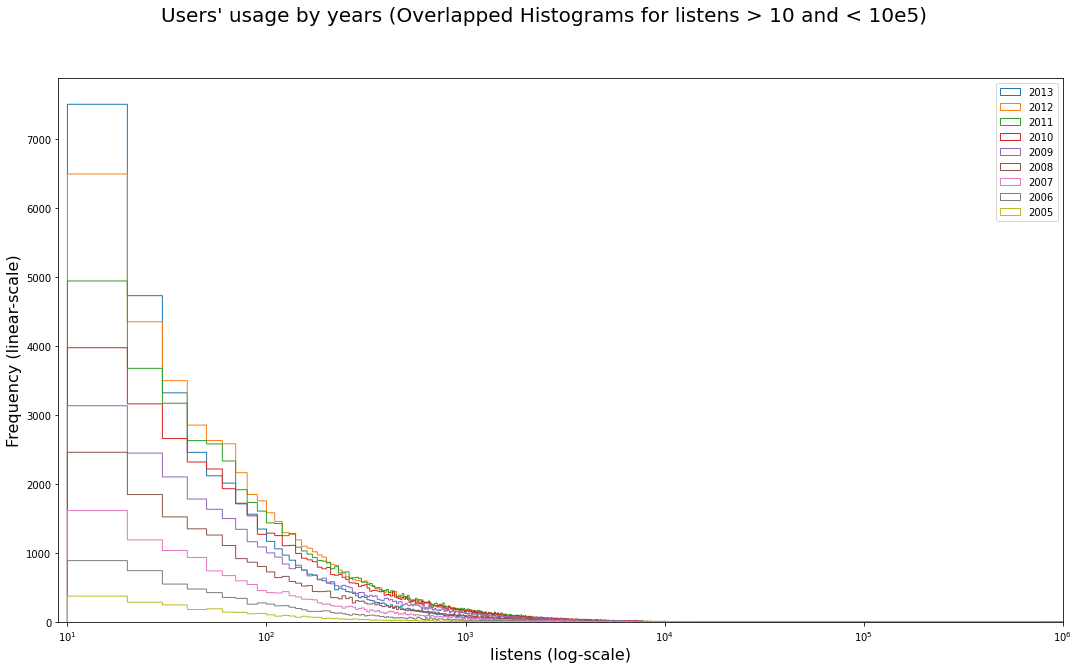

In [7]:
for f in glob("../out_data/user_listens_per_year.csv/part-*.csv"):
    df = pd.read_csv(f)
    fig = plt.figure(figsize=(18,10))
    fig.suptitle("Users' usage by years (Overlapped Histograms for listens > 10 and < 10e5)", fontsize=20)
    # plt.yscale('symlog')
    plt.xlim((9, 10e5))
    plt.xscale('symlog')
    plt.ylabel("Frequency (linear-scale)", fontsize=16)
    plt.xlabel("listens (log-scale)", fontsize=16)
    for year in reversed(range(2005, 2014)):
        yr = str(year)
        plt.hist(df["sum(yr_"+yr+")"],
            range = (10, 10e5),
            bins=int(10e4),
            histtype='step',
            label=yr,
            )
    plt.legend()

##  Subscribed users by years

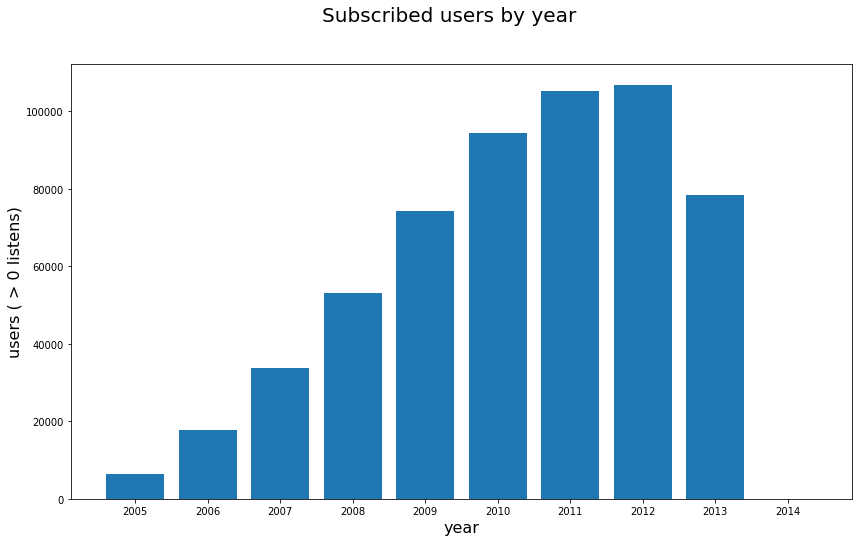

In [60]:
years = range(2005, 2015)
for f in glob("../out_data/user_listens_per_year.csv/part-*.csv"):
    df = pd.read_csv(f)
    sizes = []
    for year in reversed(years):
        yr = str(year)
        size = df[df["sum(yr_"+yr+")"] != 0]["sum(yr_"+yr+")"].size
        sizes.append(size)
    sizes = list(reversed(sizes))
    fig = plt.figure(figsize=(14,8))
    fig.suptitle("Subscribed users by year", fontsize = 20)
    plt.xticks(years)
    plt.xlabel("year", fontsize = 16)
    plt.ylabel("users ( > 0 listens)", fontsize = 16)
    plt.bar(years, sizes)

# Listen Quantile distributions by year

In [58]:
# Restructure database
arr = []
for year in range(2005, 2015):
    a = list([year])
    for p in data[str(year)]:
        a.append(p)
    arr.append(a)
arr = np.array(arr)


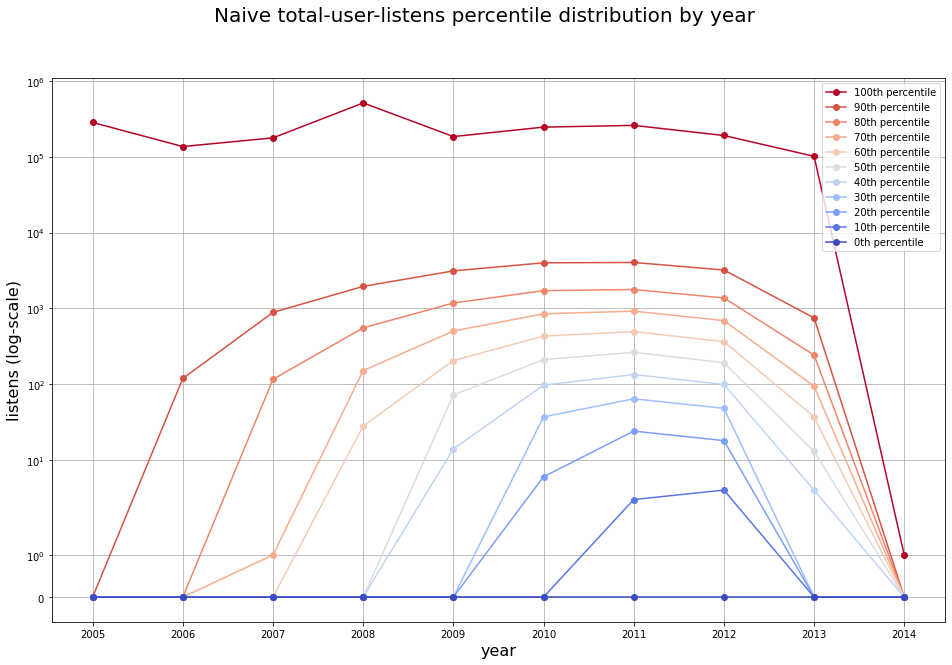

In [63]:
with open('../out_data/user_rec_listen_percentiles_by_year.json', 'rb') as f:
    data = json.load(f)

fig = plt.figure(figsize=(16,10))
fig.suptitle("Naive total-user-listens percentile distribution by year", fontsize=20)
plt.grid(True, which="both", ls="-")
plt.yscale('symlog')
plt.xticks(range(2005, 2015))
plt.xlabel("year", fontsize = 16)
plt.ylabel("listens (log-scale)", fontsize = 16)

for level in reversed(range(0,11)):
    rgba_color = cm.coolwarm(norm(level/10)) 
    plt.plot(arr[:,0], arr[:,level+1], 
                label = str(level*10) +"th percentile",
                marker='o',
                color=rgba_color)
# plt.xlim((-0.1,1e3))
# plt.ylim((-0.1,10e2))
plt.legend()
# plt.savefig('images/'+year+"_next_year_percentiles_log_log.svg")
# plt.close(fig)